# Inspect unbiased session data from `ibldata`

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from bfdm.iblmodel import fit_ibl
from bfdm import ibldata

## Load session data

In [2]:
DATA_DIR = '../data/processed/ashwood'

session_dict = ibldata.load_sessions(DATA_DIR)
sessions = [s for s_list in session_dict.values() for s in s_list]
print(f'Loaded {len(sessions)} sessions from {len(session_dict.keys())} animals.')

Loaded 1926 sessions from 37 animals.


Ashwood et al. also ended up with 37 animals, so this means we're probably doing something right.

## Plot example session

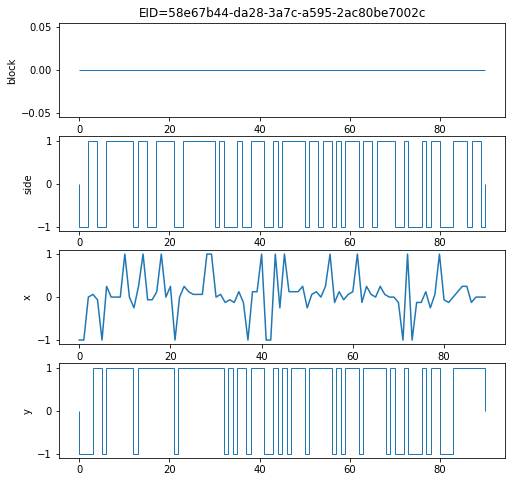

In [6]:
# Select session to plot
sdata = sessions[0]

fig, ax = plt.subplots(4, 1, figsize=(8, 8))

ax[0].stairs(sdata.block)
ax[0].set_ylabel('block')

ax[1].stairs(sdata.side)
ax[1].set_ylabel('side')

ax[2].plot(sdata.contrast)
ax[2].set_ylabel('x')

ax[3].stairs(sdata.choice)
ax[3].set_ylabel('y')

ax[0].set_title(f'EID={sdata.eid}');

## Compute accuracy of subjects for all sessions

In [4]:
def compute_accuracy(sdata: ibldata.SessionData) -> float:

    n_correct = np.sum((sdata.side * sdata.choice + 1) / 2)
    n_total = sdata.side.shape[0]

    return n_correct / n_total

acc_vals = [compute_accuracy(s) for s in sessions]

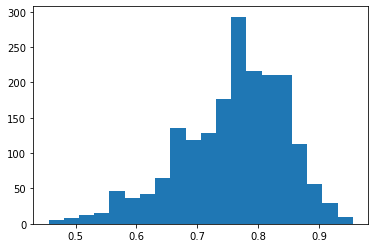

In [5]:
plt.hist(acc_vals, 20);

Why are there a few sessions with accuracy values equal to or lower than chance? Shouldn't we have filtered these out?

0.47259698916344367

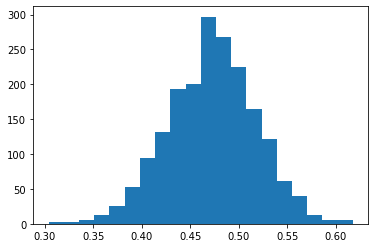

In [21]:
std_vals = np.array([np.std(s.contrast) for s in sessions])
plt.hist(std_vals, 20);
np.mean(std_vals)

In [23]:
xvals = np.unique(sdata.contrast)

In [24]:
xvals

array([-1.    , -0.25  , -0.125 , -0.0625,  0.    ,  0.0625,  0.125 ,
        0.25  ,  1.    ])